In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy.stats import linregress
from scipy import stats

print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

df = pd.read_csv('Vic Energy.csv')
df.transpose()

scattercolor = 'green'
linecolor = 'red'

Numpy:  1.19.2
Pandas:  1.1.3


In [4]:
# Clean Data into two subsets
#2019
df['date'] = pd.to_datetime(df['date'])
start_date2019 = '12-31-2018'
end_date2019 = '12-31-2019'
df2019 = df[(df['date'] > start_date2019) & (df['date'] <= end_date2019)].copy()
#df2019.head()

#remove outliers
df2019.loc[df2019['RRP'] > 400] = np.NaN
df2019 = df2019.dropna(axis=0, how='any')

#2015-2019
start_date1520 = '12-31-2014'
end_date1520 = '8-31-2020'
df1520 = df[(df['date'] > start_date1520) & (df['date'] <= end_date1520)].copy()

#remove outliers
df2019.loc[df2019['RRP'] > 400] = np.NaN
df2019 = df2019.dropna(axis=0, how='any')
df1520.loc[df1520['RRP'] > 400] = np.NaN
df1520 = df1520.dropna(axis=0, how='any')


df2019

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
1461,2019-01-01,98933.060,78.560979,98933.060,78.560979,0.0,0.0,0.0,15.5,26.2,31.7,0.0,N,Y
1462,2019-02-01,106470.675,92.202011,106470.675,92.202011,0.0,0.0,0.0,18.4,22.2,26.3,0.0,N,N
1463,2019-03-01,118789.605,127.380303,118789.605,127.380303,0.0,0.0,0.0,15.9,29.5,27.6,0.0,N,N
1464,2019-04-01,133288.460,121.020997,133288.460,121.020997,0.0,0.0,0.0,18.0,42.6,27.4,0.0,N,N
1465,2019-05-01,97262.790,83.493520,97262.790,83.493520,0.0,0.0,0.0,17.4,21.2,12.9,0.4,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-27,107256.065,56.122451,107256.065,56.122451,0.0,0.0,0.0,13.6,23.9,31.6,0.0,N,N
1822,2019-12-28,113521.685,63.295449,113521.685,63.295449,0.0,0.0,0.0,16.7,28.4,20.6,0.0,N,N
1823,2019-12-29,118293.525,87.686689,118293.525,87.686689,0.0,0.0,0.0,16.8,33.2,31.9,0.0,N,N
1824,2019-12-30,140410.125,295.829202,140410.125,295.829202,0.0,0.0,0.0,19.7,40.8,18.8,0.0,N,N


<Figure size 432x288 with 0 Axes>

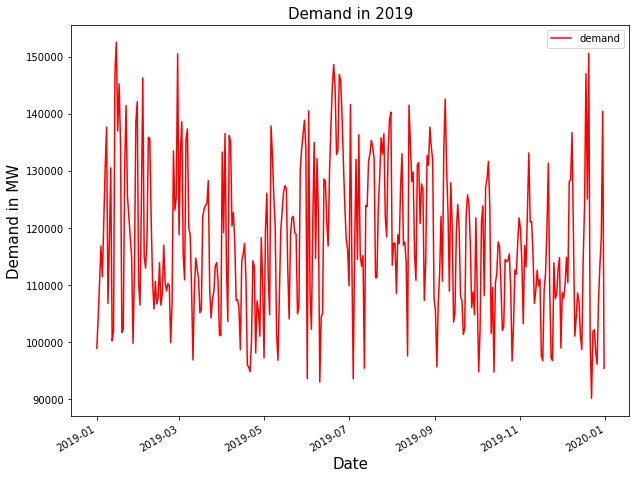

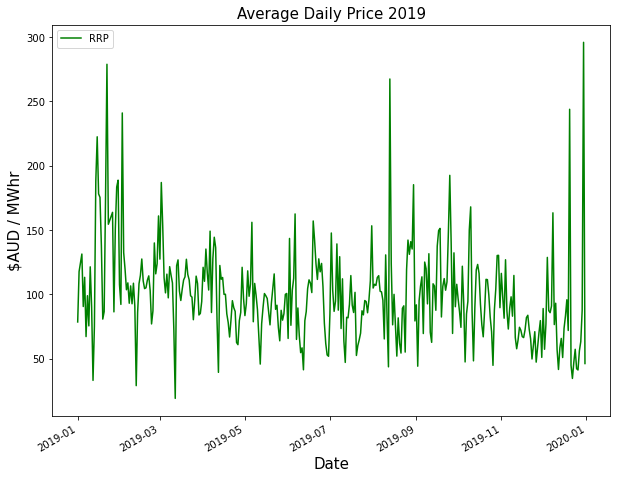

,demand,RRP
demand,1.000000,0.574567
RRP,0.574567,1.000000


In [3]:
#overlay plots of demand and price
#check date and extract most recent year, store as df2019

#plot charts
plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
df2019.plot.line(x='date',y='demand', c = 'red', figsize = (10,8), title = 'Demand in 2019')
plt.xlabel('Date')
plt.ylabel('Demand in MW')
plt.show()

df2019.plot.line(x='date',y='RRP', c = 'green', figsize = (10,8), title = 'Average Daily Price 2019')
plt.xlabel('Date')
plt.ylabel('$AUD / MWhr')
plt.show()

#show correlation
df2019[['demand','RRP']].corr()

0.001607319562305681


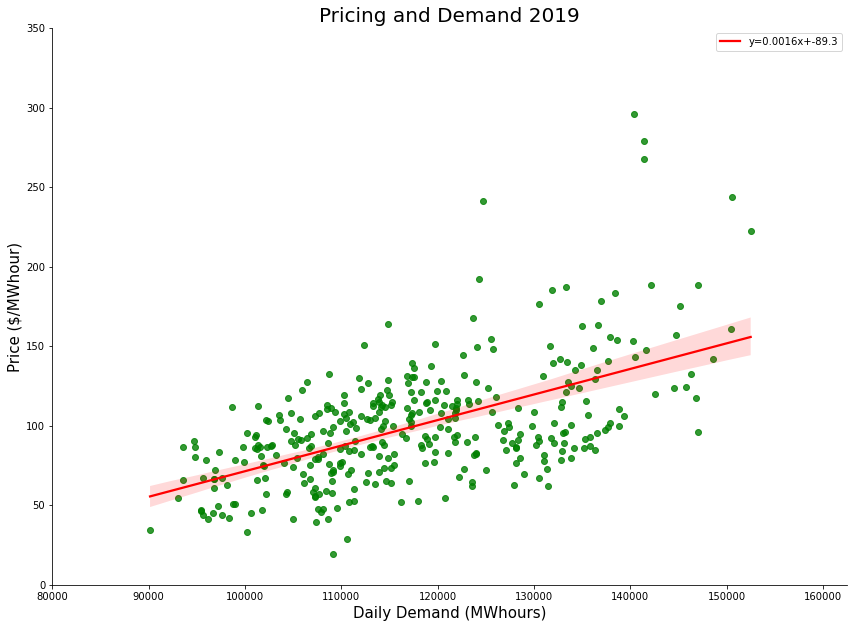

In [ ]:
#df2019.plot.scatter(x='demand',y='RRP', title = 'Pricing and Demand 2019', color = 'red')
#ax = sns.lmplot(x = "demand", y = "RRP",data = df2019,  fit_reg = True, hue = 'species')
x = df2019['demand']
y = df2019['RRP']
linregress(x,y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope)

plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20
ax = sns.lmplot(x = "demand", y = "RRP",data = df2019, fit_reg = True, scatter_kws={'color': scattercolor}, line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor}, height=8.27, aspect=11.7/8.27)
ax.set(title = 'Pricing and Demand 2019')
ax.set(xlabel = 'Daily Demand (MWhours)')
ax.set(ylabel = 'Price ($/MWhour)') 
ax.set(xlim = [80000,(df2019['demand'].max()+10000)], ylim = [0,350])
plt.legend()

plt.show()

#scatter_kws={'color': scattercolor},

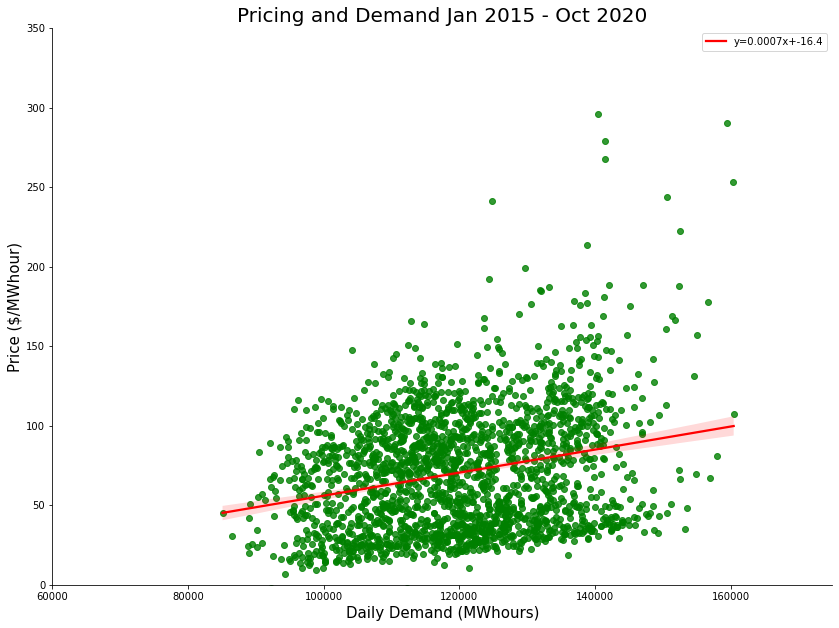

In [ ]:

slope, intercept, r_value, p_value, std_err = stats.linregress(df1520['demand'],df1520['RRP'])


ax = sns.lmplot(x = "demand", y = "RRP",data = df1520,  fit_reg = True,  scatter_kws={'color': scattercolor}, line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor}, height=8.27, aspect=11.7/8.27)
ax.set(title = 'Pricing and Demand Jan 2015 - Oct 2020',
                  ylabel = 'Price ($/MWhour)',
                  xlabel = 'Daily Demand (MWhours)' )
ax.set(xlim = [60000,175000], ylim = [0,350])
plt.legend()

In [ ]:
df1520[['demand','min_temperature', 'max_temperature']].corr()


,demand,min_temperature,max_temperature
demand,1.000000,-0.181912,-0.122618
min_temperature,-0.181912,1.000000,0.702014
max_temperature,-0.122618,0.702014,1.000000


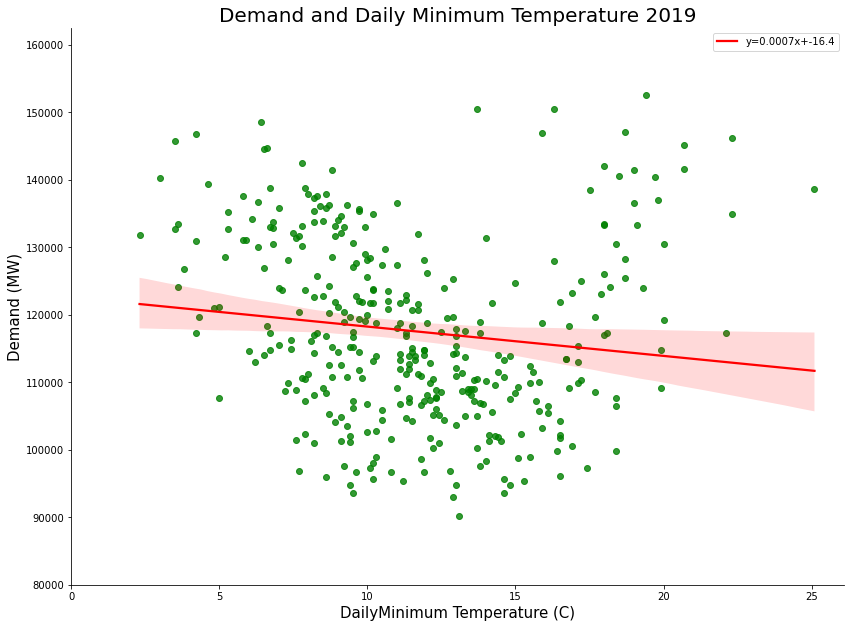

In [ ]:
ax = sns.lmplot(x = "min_temperature",y = "demand",data = df2019,  fit_reg = True, scatter_kws={'color': scattercolor},line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor},height=8.27, aspect=11.7/8.27)
ax.set(title = 'Demand and Daily Minimum Temperature 2019',
                  ylabel = 'Demand (MW)',
                  xlabel = 'DailyMinimum Temperature (C)' )
ax.set(xlim = [0,df2019['min_temperature'].max()+1], ylim = [80000,df2019['demand'].max()+10000])
plt.legend()


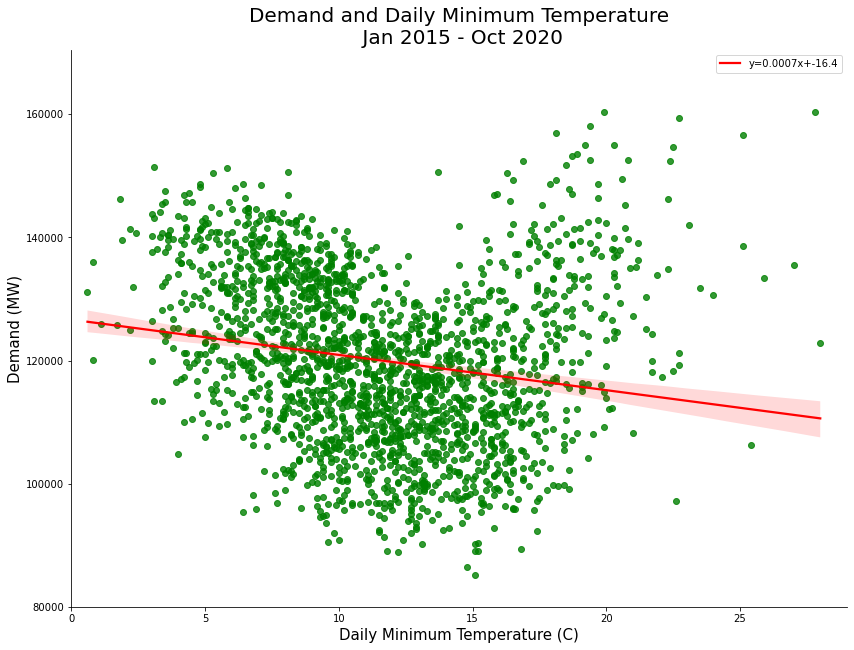

In [ ]:
ax = sns.lmplot(x = "min_temperature",y = "demand",data = df1520,  fit_reg = True, scatter_kws={'color': scattercolor},line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor},height=8.27, aspect=11.7/8.27)
ax.set(title = 'Demand and Daily Minimum Temperature\n Jan 2015 - Oct 2020',
                  ylabel = 'Demand (MW)',
                  xlabel = 'Daily Minimum Temperature (C)' )
ax.set(xlim = [0,df1520['min_temperature'].max()+1], ylim = [80000,df1520['demand'].max()+10000])
plt.legend()


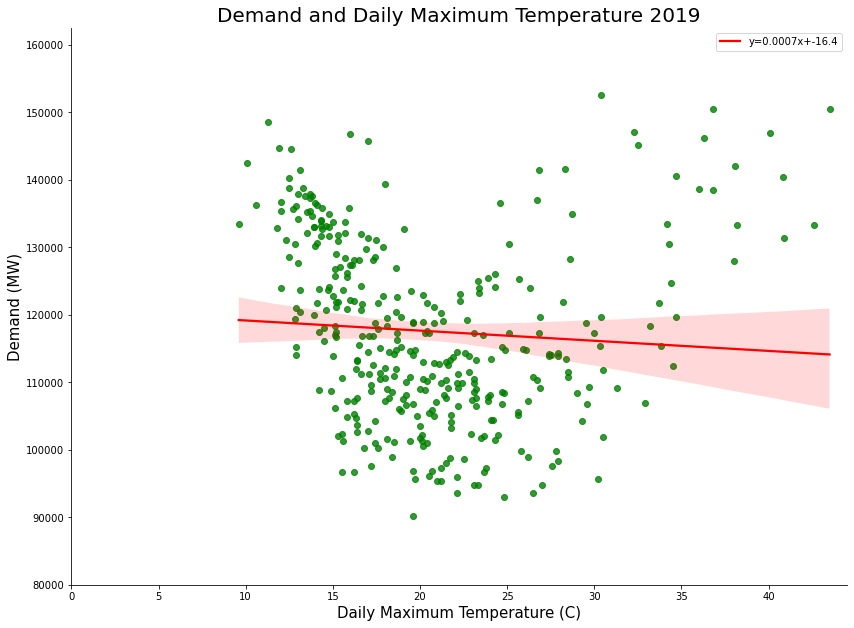

In [ ]:
ax = sns.lmplot(x = "max_temperature",y = "demand",data = df2019,  fit_reg = True, scatter_kws={'color': scattercolor},line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor},height=8.27, aspect=11.7/8.27)
ax.set(title = 'Demand and Daily Maximum Temperature 2019',
                  ylabel = 'Demand (MW)',
                  xlabel = 'Daily Maximum Temperature (C)' )
ax.set(xlim = [0,df2019['max_temperature'].max()+1], ylim = [80000,df2019['demand'].max()+10000])
plt.legend()

In [ ]:
ax = sns.lmplot(x = "max_temperature",y = "demand",data = df1520,  fit_reg = True, scatter_kws={'color': k},line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor},height=8.27, aspect=11.7/8.27)
ax.set(title = 'Demand and Daily Maximum Temperature Jan 2015 - Oct 2020',
                  ylabel = 'Demand (MW)',
                  xlabel = 'Daily Maximum Temperature (C)' )
ax.set(xlim = [0,df1520['max_temperature'].max()+1], ylim = [80000,df1520['demand'].max()+10000])
plt.legend()

NameError: name 'k' is not defined

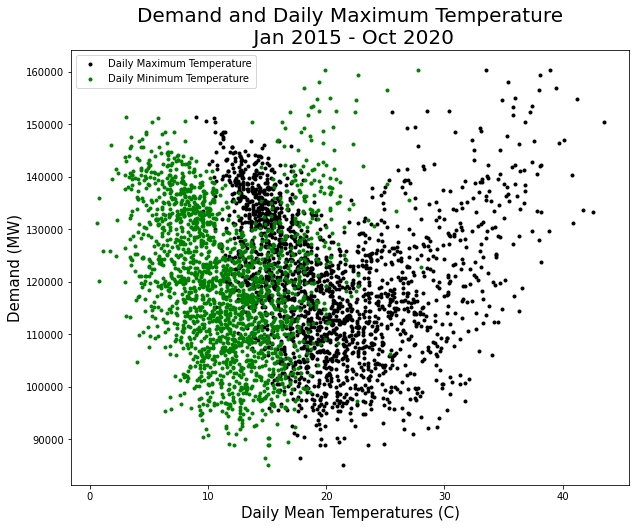

In [ ]:
plt.figure(figsize = (10,8))
plt.scatter(df1520['max_temperature'], df1520['demand'],color='k', marker = '.', label = 'Daily Maximum Temperature')
plt.scatter(df1520['min_temperature'], df1520['demand'],color='g', marker = '.', label = 'Daily Minimum Temperature')
plt.title('Demand and Daily Maximum Temperature\n Jan 2015 - Oct 2020')
plt.ylabel('Demand (MW)')
plt.xlabel('Daily Mean Temperatures (C)' )
plt.legend()
plt.show()





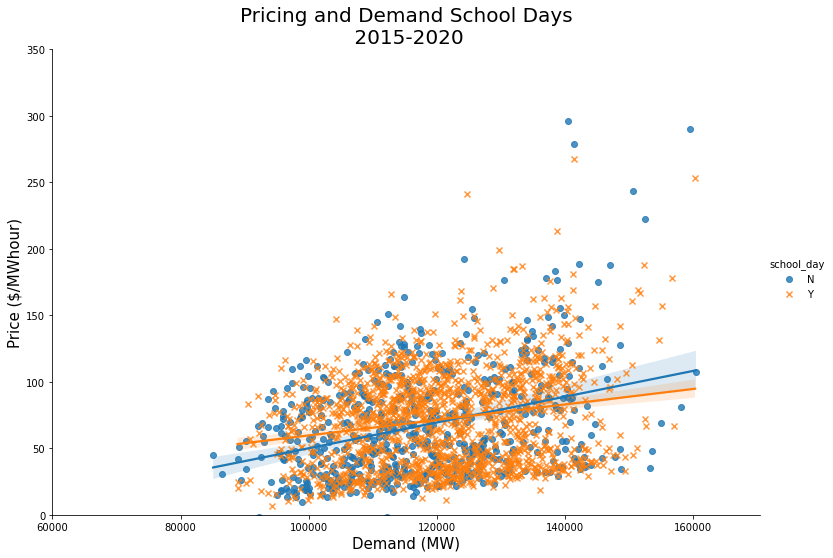

In [ ]:
ax = sns.lmplot(x = "demand", y = "RRP",data = df1520,  fit_reg = True, hue = 'school_day',height=7, aspect=1.5,
                markers = ["o", "x"]
               )
ax.set(title = 'Pricing and Demand School Days\n 2015-2020',
                  ylabel = 'Price ($/MWhour)',
                  xlabel = 'Demand (MW)' )
ax.set(xlim = [60000,df1520['demand'].max()+10000], ylim = [0,350])


In [1]:
sdlisty = df1520[df1520['school_day'] == 'Y']
sdlistn = df1520[df1520['school_day'] == 'N']

print(f'sdlisty Median: {sdlisty["demand"].median()}\nsdlistn Median: {sdlistn["demand"].median()}')
#print(f'Median: {sdlisty['demand']})

plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

ax = sdlisty['demand'].hist(bins = 200, label = 'School Day', density = True, figsize = (10,8), color = 'purple', alpha = 0.8)
sdlistn['demand'].hist(bins = 200,label = 'Not School Day',  density = True, figsize = (10,8), color = 'orange', alpha = 0.8)

plt.xlabel('Daily Demand (MWhours)')
plt.ylabel('Frequency')
plt.title('Daily Demand, School Days\n Normalised')
plt.legend()
plt.show()

NameError: name 'df1520' is not defined

sdlisty Median: 100696.565
sdlistn Median: 120086.6775


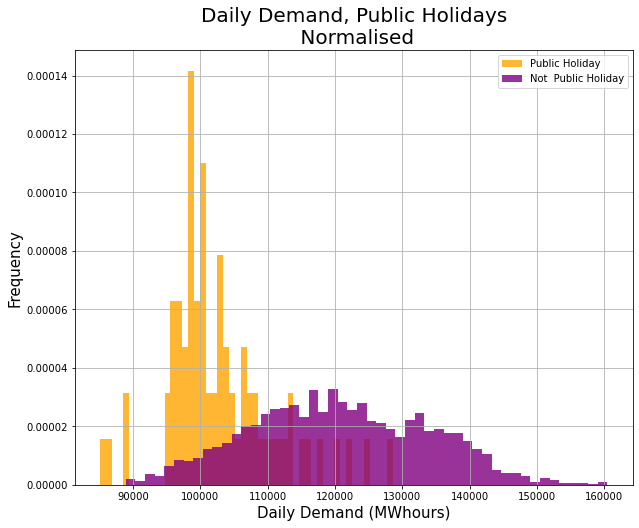

In [ ]:
hdlisty = df1520[df1520['holiday'] == 'Y']
hdlistn = df1520[df1520['holiday'] == 'N']

print(f'sdlisty Median: {hdlisty["demand"].median()}\nsdlistn Median: {hdlistn["demand"].median()}')

plt.figure()
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 20

hdlisty['demand'].hist(bins = 50, label = 'Public Holiday', density = True, figsize = (10,8), color = 'orange', alpha = 0.8)
hdlistn['demand'].hist(bins = 50,label = 'Not  Public Holiday',  density = True, figsize = (10,8), color = 'purple', alpha = 0.8)

plt.xlabel('Daily Demand (MWhours)')
plt.ylabel('Frequency')
plt.title('Daily Demand, Public Holidays\n Normalised')
plt.legend()
plt.show()

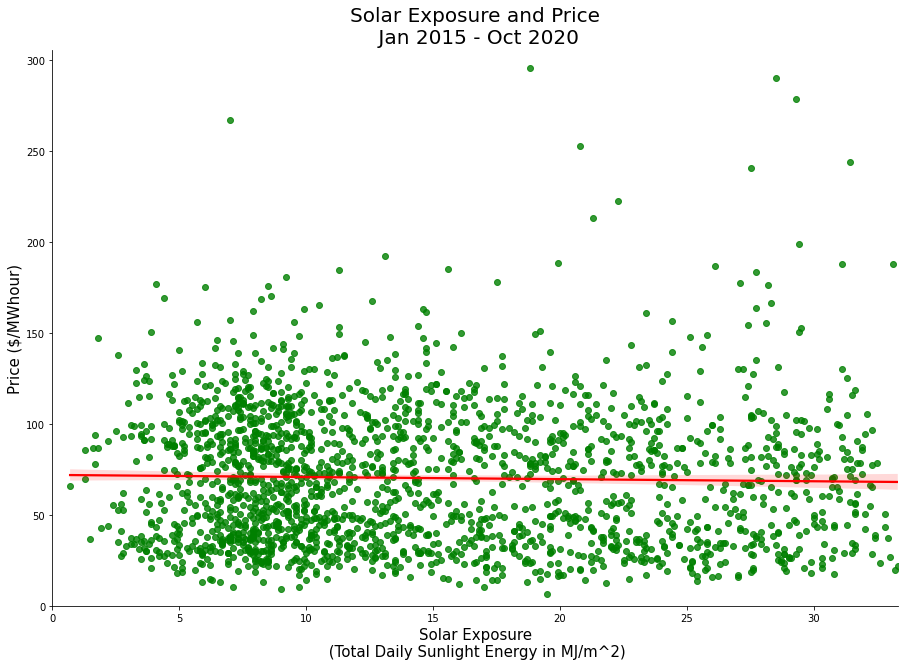

In [ ]:
ax = sns.lmplot(x = "solar_exposure", y = "RRP",data = df1520,  fit_reg = True,scatter_kws={'color': scattercolor},line_kws={'label':"y={0:.4f}x+{1:.1f}".format(slope,intercept), 'color': linecolor}, height=8.27, aspect=1.5)
ax.set(title = 'Solar Exposure and Price\n Jan 2015 - Oct 2020',
                  ylabel = 'Price ($/MWhour)',
                  xlabel = 'Solar Exposure\n (Total Daily Sunlight Energy in MJ/m^2)' )
ax.set(xlim = [0,df1520["solar_exposure"].max()], ylim = [0,df1520["RRP"].max()+10])

In [ ]:
gb_yr = df.groupby(level=0)
gb_qtr = df.groupby(level=1)
gb_yr_qtr = df.groupby(level=(0,1))

ValueError: level > 0 or level < -1 only valid with MultiIndex